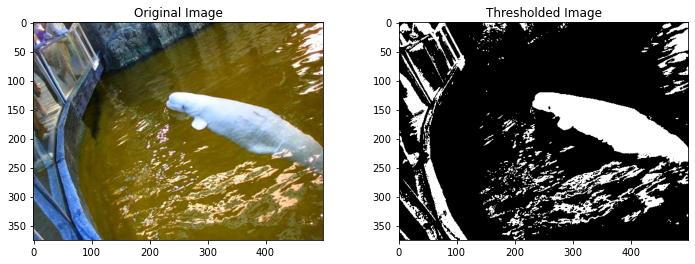

In [36]:
input_img_path = "images/ADE_train_00001493.jpg"

import cv2
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the image to create a binary image
threshold, thresholded_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Save the ground truth image to a file
#cv2.imwrite("images/thresholded_img.png", thresholded_img)

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap="gray")
plt.title("Thresholded Image")
plt.show()

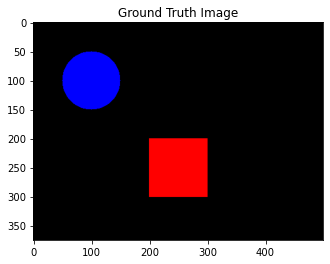

In [31]:
# generate ground truth image
import cv2
import numpy as np
# Load the input image
img_for_size = cv2.imread("images/ADE_train_00001493.jpg")

img = cv2.imread("images/ground_truth.png")

# Create an empty image with the same dimensions as the input image
ground_truth_img = np.zeros_like(img_for_size)
ground_truth_img.shape
# Draw a red circle on the ground truth image to represent a foreground object
cv2.circle(ground_truth_img, (100, 100), 50, (0, 0, 255), -1)

# Draw a blue rectangle on the ground truth image to represent a background object
cv2.rectangle(ground_truth_img, (200, 200), (300, 300), (255, 0, 0), -1)

# Save the ground truth image to a file
cv2.imwrite("images/ground_truth.png", ground_truth_img)

# Display the input image and the ground truth image
plt.figure(figsize=(12, 4))
plt.imshow(ground_truth_img, cmap="gray")
plt.title("Ground Truth Image")
plt.show()

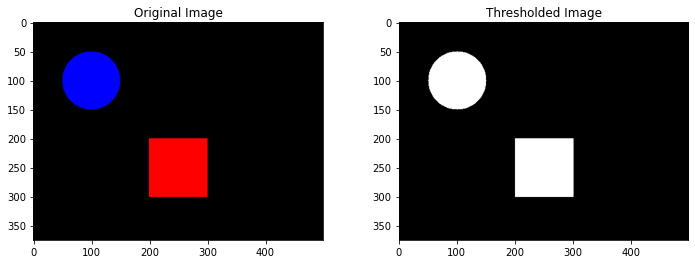

In [34]:
# perform threshold-based segmentation
import cv2

# Load the input image
img = ground_truth_img

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the threshold value
threshold = 1

# Apply a threshold to the image to create a binary image
thresholded_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap="gray")
plt.title("Thresholded Image")
plt.show()

# METHOD
The thresholding method used in the example code is cv2.THRESH_BINARY.

This method creates a binary image where the pixels with a value greater than or equal to the threshold are set to a maximum value (in this case, 255) and the pixels with a value less than the threshold are set to a minimum value (in this case, 0).

src is the source image which should be thresholded, thresh is the threshold value, maxval is the value to be given if pixel value is more than (sometimes less than) the threshold value, and type is the type of thresholding which is used.

In this example, the cv2.THRESH_BINARY thresholding method is used to create a binary image where pixels with a value greater than or equal to the threshold (1) are set to 255 (white) and pixels with a value less than the threshold are set to 0 (black).

In [33]:
# True Positives (TP) = Pixels correctly classified as foreground
TP = np.sum(np.logical_and(thresholded_img == 255, ground_truth_img[:,:,0] == 255))

# True Negatives (TN) = Pixels correctly classified as background
TN = np.sum(np.logical_and(thresholded_img == 0, ground_truth_img[:,:,0] == 0))

# False Positives (FP) = Pixels incorrectly classified as foreground
FP = np.sum(np.logical_and(thresholded_img == 255, ground_truth_img[:,:,0] == 0))

# False Negatives (FN) = Pixels incorrectly classified as background
FN = np.sum(np.logical_and(thresholded_img == 0, ground_truth_img[:,:,0] == 255))

# Accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision = TP / (TP + FP)
precision = TP / (TP + FP)

# Recall = TP / (TP + FN)
recall = TP / (TP + FN)

# F1 Score = 2 * (precision * recall) / (precision + recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Accuracy:  0.95816
Precision:  0.5652776238501607
Recall:  1.0
F1 Score:  0.7222713916522109
